Hurray! Lets start with Tensor flow

In [3]:
from __future__ import print_function

import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

In [4]:
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")

In [5]:
california_housing_dataframe

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66900.0
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80100.0
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85700.0
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73400.0
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.3,40.6,52.0,2217.0,394.0,907.0,369.0,2.4,111400.0
16996,-124.3,40.7,36.0,2349.0,528.0,1194.0,465.0,2.5,79000.0
16997,-124.3,41.8,17.0,2677.0,531.0,1244.0,456.0,3.0,103600.0
16998,-124.3,41.8,19.0,2672.0,552.0,1298.0,478.0,2.0,85800.0


In [6]:
california_housing_dataframe = california_housing_dataframe.reindex(
    np.random.permutation(california_housing_dataframe.index))

In [7]:
california_housing_dataframe["median_house_value"] /= 1000.0
california_housing_dataframe

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
16042,-122.4,37.5,16.0,7077.0,1179.0,3502.0,1148.0,6.0,345.1
12825,-121.8,37.3,16.0,1911.0,327.0,1158.0,332.0,5.9,249.5
6026,-118.2,34.1,34.0,1709.0,562.0,2105.0,503.0,2.0,152.1
16609,-122.7,38.4,38.0,1689.0,526.0,1071.0,529.0,1.5,124.0
152,-116.2,33.8,22.0,894.0,192.0,830.0,202.0,3.1,68.2
...,...,...,...,...,...,...,...,...,...
7270,-118.3,34.1,52.0,1421.0,163.0,495.0,167.0,10.6,500.0
16716,-122.9,39.1,24.0,3127.0,674.0,1015.0,448.0,2.0,78.8
4960,-118.1,34.1,19.0,3215.0,907.0,3072.0,870.0,2.3,202.3
15171,-122.3,40.5,17.0,2255.0,416.0,1171.0,411.0,2.9,129.8


In [8]:
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0



In order to import our training data into TensorFlow, we need to specify what type of data each feature contains. There are two main types of data we'll use in this and future exercises:

    Categorical Data: Data that is textual. In this exercise, our housing data set does not contain any categorical features, but examples you might see would be the home style, the words in a real-estate ad.

    Numerical Data: Data that is a number (integer or float) and that you want to treat as a number. As we will discuss more later sometimes you might want to treat numerical data (e.g., a postal code) as if it were categorical.

In TensorFlow, we indicate a feature's data type using a construct called a feature column. Feature columns store only a description of the feature data; they do not contain the feature data itself.

To start, we're going to use just one numeric input feature, total_rooms. The following code pulls the total_rooms data from our california_housing_dataframe and defines the feature column using numeric_column, which specifies its data is numeric:

In [9]:
my_feature = california_housing_dataframe[["total_rooms"]]
feature_columns = [tf.feature_column.numeric_column("total_rooms")]

In [10]:
#define the labels which is the median house value
targets = california_housing_dataframe["median_house_value"]

Next, we'll configure a linear regression model using LinearRegressor. We'll train this model using the GradientDescentOptimizer, which implements Mini-Batch Stochastic Gradient Descent (SGD). The learning_rate argument controls the size of the gradient step.

NOTE: To be safe, we also apply gradient clipping to our optimizer via clip_gradients_by_norm. Gradient clipping ensures the magnitude of the gradients do not become too large during training, which can cause gradient descent to fail.


In [11]:
my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0000001)
my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
# Configure the linear regression model with our feature columns and optimizer.
# Set a learning rate of 0.0000001 for Gradient Descent.

In [12]:
linear_regressor = tf.estimator.LinearRegressor(
    feature_columns = feature_columns, 
    optimizer = my_optimizer
)

To import our California housing data into our LinearRegressor, we need to define an input function, which instructs TensorFlow how to preprocess the data, as well as how to batch, shuffle, and repeat it during model training.

First, we'll convert our pandas feature data into a dict of NumPy arrays. We can then use the TensorFlow Dataset API to construct a dataset object from our data, and then break our data into batches of batch_size, to be repeated for the specified number of epochs (num_epochs).

NOTE: When the default value of num_epochs=None is passed to repeat(), the input data will be repeated indefinitely.

Next, if shuffle is set to True, we'll shuffle the data so that it's passed to the model randomly during training. The buffer_size argument specifies the size of the dataset from which shuffle will randomly sample.

Finally, our input function constructs an iterator for the dataset and returns the next batch of data to the LinearRegressor.


In [13]:
def my_input_fn(features, targets, batch_size = 1, shuffle = True, num_epochs = None):
    #convert the pandas data into dictionary of features of np arrays.
    features =  {key: np.array(value) for key,value in dict(features).items()}
    
  # Construct a dataset, and configure batching/repeating.
    ds = Dataset.from_tensor_slices((features,targets))
    ds = ds.batch(batch_size).repeat(num_epochs)
    #shuffle if shuffle is true
    if shuffle:
        ds=ds.shuffle(buffer_size=10000)
    #Return the next batch of data
    features,labels = ds.make_one_shot_iterator().get_next()
    return features, labels

In [14]:
# call train on our linear regressor to train our model
#
_train = linear_regressor.train(
    input_fn = lambda : my_input_fn(my_feature, targets),
    steps = 100
)

In [15]:
#create an input function for prediction
prediction_input_fn = lambda : my_input_fn(my_feature, targets, num_epochs = 1, shuffle = False)
predictions = linear_regressor.predict(input_fn = prediction_input_fn)
predictions = np.array([item['predictions'][0] for item in predictions])

#print mean squared error and root mean squared error
mean_squared_error = metrics.mean_squared_error(predictions, targets)
root_mean_squared_error = math.sqrt(mean_squared_error)

print("Mean squared error on training data:%0.3f" % mean_squared_error)
print("roor mean squared error on training data:%0.3f" % root_mean_squared_error)

Mean squared error on training data:56367.025
roor mean squared error on training data:237.417


Is this a good model? How would you judge how large this error is?

Mean Squared Error (MSE) can be hard to interpret, so we often look at Root Mean Squared Error (RMSE) instead. A nice property of RMSE is that it can be interpreted on the same scale as the original targets.

Let's compare the RMSE to the difference of the min and max of our targets:

In [16]:
min_house_value = california_housing_dataframe["median_house_value"].min()
max_house_value = california_housing_dataframe["median_house_value"].max()
min_max_difference = max_house_value - min_house_value
print("Min median house value %0.3f" % min_house_value)
print("Max median house value %0.3f" % max_house_value)
print("difference between max and min median house value %.3f" % min_max_difference)
print("Root mean squared error %0.3f" % root_mean_squared_error)


Min median house value 14.999
Max median house value 500.001
difference between max and min median house value 485.002
Root mean squared error 237.417


Our error spans nearly half the range of the target values. Can we do better?

This is the question that nags at every model developer. Let's develop some basic strategies to reduce model error.

The first thing we can do is take a look at how well our predictions match our targets, in terms of overall summary statistics.


In [19]:
calibration_data = pd.DataFrame()
calibration_data["predictions"] = pd.Series(predictions)
calibration_data["targets"] = pd.Series(targets)
calibration_data.describe()

,predictions,targets
count,17000.0,17000.0
mean,0.1,207.3
std,0.1,116.0
min,0.0,15.0
25%,0.1,119.4
50%,0.1,180.4
75%,0.2,265.0
max,1.9,500.0


Okay, maybe this information is helpful. How does the mean value compare to the model's RMSE? How about the various quantiles?

We can also visualize the data and the line we've learned. Recall that linear regression on a single feature can be drawn as a line mapping input x to output y.

First, we'll get a uniform random sample of the data so we can make a readable scatter plot.


In [20]:
sample =  california_housing_dataframe.sample(n=300)


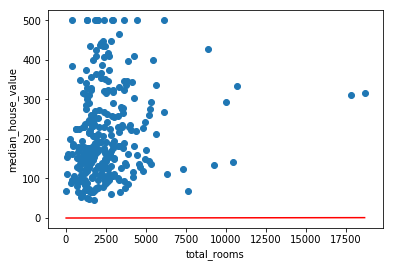

In [22]:
#get the max and min room value
x_0 = sample["total_rooms"].min()
x_1 = sample["total_rooms"].max()

#retrieve the final weight and bias generted during the training
weight = linear_regressor.get_variable_value('linear/linear_model/total_rooms/weights')[0]
bias = linear_regressor.get_variable_value('linear/linear_model/bias_weights')


# Get the predicted median_house_values for the min and max total_rooms values.
y_0 = weight * x_0 + bias 
y_1 = weight * x_1 + bias

# Plot our regression line from (x_0, y_0) to (x_1, y_1).
plt.plot([x_0, x_1], [y_0, y_1], c='r')


# Label the graph axes.
plt.ylabel("median_house_value")
plt.xlabel("total_rooms")


# Plot a scatter plot from our data sample.
plt.scatter(sample["total_rooms"], sample["median_house_value"])

# Display graph.
plt.show()

In [27]:
def train_model(learning_rate, steps, batch_size, input_feature="total_rooms"):
  """Trains a linear regression model of one feature.
  
  Args:
    learning_rate: A `float`, the learning rate.
    steps: A non-zero `int`, the total number of training steps. A training step
      consists of a forward and backward pass using a single batch.
    batch_size: A non-zero `int`, the batch size.
    input_feature: A `string` specifying a column from `california_housing_dataframe`
      to use as input feature.
  """
  
  periods = 10
  steps_per_period = steps / periods

  my_feature = input_feature
  my_feature_data = california_housing_dataframe[[my_feature]]
  my_label = "median_house_value"
  targets = california_housing_dataframe[my_label]

  # Create feature columns.
  feature_columns = [tf.feature_column.numeric_column(my_feature)]
  
  # Create input functions.
  training_input_fn = lambda:my_input_fn(my_feature_data, targets, batch_size=batch_size)
  prediction_input_fn = lambda: my_input_fn(my_feature_data, targets, num_epochs=1, shuffle=False)
  
  # Create a linear regressor object.
  my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
  my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
  linear_regressor = tf.estimator.LinearRegressor(
      feature_columns=feature_columns,
      optimizer=my_optimizer
  )

  # Set up to plot the state of our model's line each period.
  plt.figure(figsize=(15, 6))
  plt.subplot(1, 2, 1)
  plt.title("Learned Line by Period")
  plt.ylabel(my_label)
  plt.xlabel(my_feature)
  sample = california_housing_dataframe.sample(n=300)
  plt.scatter(sample[my_feature], sample[my_label])
  colors = [cm.coolwarm(x) for x in np.linspace(-1, 1, periods)]

  # Train the model, but do so inside a loop so that we can periodically assess
  # loss metrics.
  print("Training model...")
  print("RMSE (on training data):")
  root_mean_squared_errors = []
  for period in range (0, periods):
    # Train the model, starting from the prior state.
    linear_regressor.train(
        input_fn=training_input_fn,
        steps=steps_per_period
    )
    # Take a break and compute predictions.
    predictions = linear_regressor.predict(input_fn=prediction_input_fn)
    predictions = np.array([item['predictions'][0] for item in predictions])
    
    # Compute loss.
    root_mean_squared_error = math.sqrt(
        metrics.mean_squared_error(predictions, targets))
    # Occasionally print the current loss.
    print("  period %02d : %0.2f" % (period, root_mean_squared_error))
    # Add the loss metrics from this period to our list.
    root_mean_squared_errors.append(root_mean_squared_error)
    # Finally, track the weights and biases over time.
    # Apply some math to ensure that the data and line are plotted neatly.
    y_extents = np.array([0, sample[my_label].max()])
    
    weight = linear_regressor.get_variable_value('linear/linear_model/%s/weights' % input_feature)[0]
    bias = linear_regressor.get_variable_value('linear/linear_model/bias_weights')

    x_extents = (y_extents - bias) / weight
    x_extents = np.maximum(np.minimum(x_extents,
                                      sample[my_feature].max()),
                           sample[my_feature].min())
    y_extents = weight * x_extents + bias
    plt.plot(x_extents, y_extents, color=colors[period]) 
  print("Model training finished.")

  # Output a graph of loss metrics over periods.
  plt.subplot(1, 2, 2)
  plt.ylabel('RMSE')
  plt.xlabel('Periods')
  plt.title("Root Mean Squared Error vs. Periods")
  plt.tight_layout()
  plt.plot(root_mean_squared_errors)

  # Output a table with calibration data.
  calibration_data = pd.DataFrame()
  calibration_data["predictions"] = pd.Series(predictions)
  calibration_data["targets"] = pd.Series(targets)
  display.display(calibration_data.describe())

  print("Final RMSE (on training data): %0.2f" % root_mean_squared_error)

Training model...
RMSE (on training data):
  period 00 : 225.63
  period 01 : 214.46
  period 02 : 204.38
  period 03 : 195.31
  period 04 : 187.59
  period 05 : 181.20
  period 06 : 176.18
  period 07 : 172.35
  period 08 : 169.57
  period 09 : 167.79
Model training finished.


,predictions,targets
count,17000.0,17000.0
mean,113.7,207.3
std,93.8,116.0
min,0.1,15.0
25%,62.9,119.4
50%,91.5,180.4
75%,135.5,265.0
max,1631.5,500.0


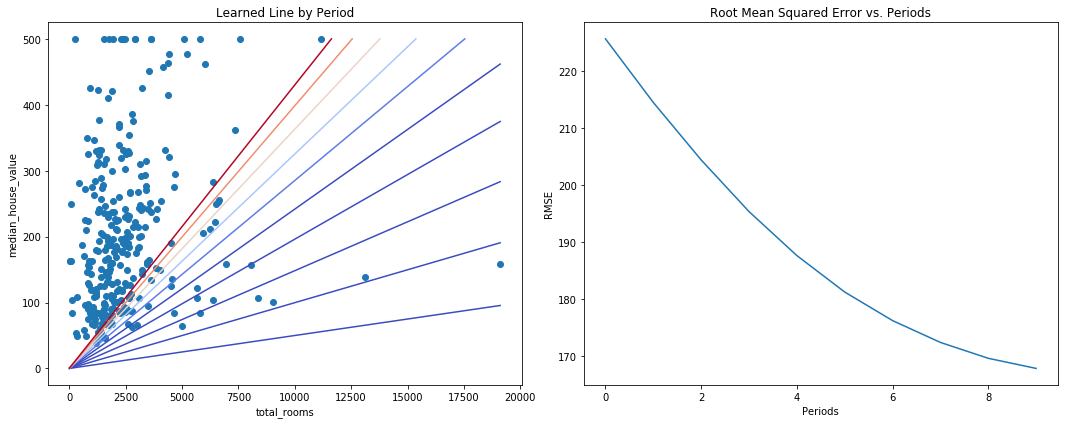

In [26]:
train_model(
    learning_rate=0.000001,
    steps=10000,
    batch_size=1
)

Training model...
RMSE (on training data):
  period 00 : 171.88
  period 01 : 180.91
  period 02 : 177.32
  period 03 : 175.80
  period 04 : 178.78
  period 05 : 178.16
  period 06 : 172.59
  period 07 : 175.13
  period 08 : 178.82
  period 09 : 175.09
Model training finished.


,predictions,targets
count,17000.0,17000.0
mean,175.4,207.3
std,134.5,116.0
min,0.4,15.0
25%,98.7,119.4
50%,143.1,180.4
75%,211.8,265.0
max,2127.6,500.0


Final RMSE (on training data): 175.09


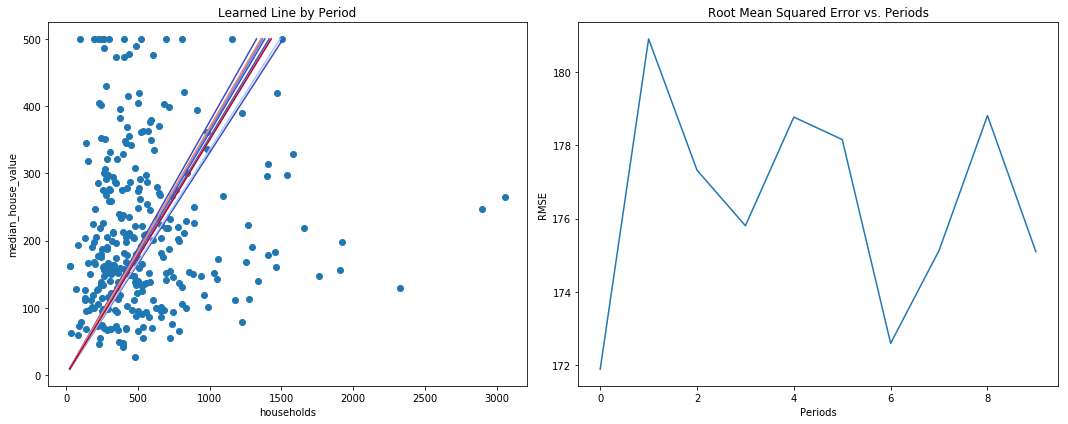

In [29]:
train_model(
    learning_rate=0.0002,
    steps=10000,
    batch_size=5,
    input_feature="households"
)